In [1]:
!unzip '/content/drive/MyDrive/Dataset_EDA/archive (3).zip'

Archive:  /content/drive/MyDrive/Dataset_EDA/archive (3).zip
  inflating: watch_data.csv          


In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('/content/watch_data.csv')

In [4]:
df

,Brand,Model,Reference,Complication,Case material,Bracelet material,Dial,Hour Markings,Lunette Material,Price
0,Rolex,Datejust 31,278240,Automatic,Steel,Steel,Silver,No Markings,Steel,7900
1,Rolex,Daytona,116520,Automatic,Steel,Steel,Yellow,No Markings,Steel,98000
2,Rolex,Air King,116900,Automatic,Steel,Steel,Black,Arabic,Steel,8750
3,Rolex,Daytona,116506,Automatic,Platinum,Platinum,Blue,No Markings,Ceramic,110900
4,Rolex,Daytona,116520,Automatic,Steel,Steel,White,No Markings,Steel,22490
...,...,...,...,...,...,...,...,...,...,...
163593,Ebel,Brasilia,1215617,Automatic,Steel,Crocodile-Leather,Silver,Roman,Steel,2095
163594,Concord,Saratoga,0310374,Quartz,Steel,Steel,Silver,No Markings,Steel,976
163595,Concord,Saratoga,1558237,Quartz,Steel,Gold/Steel,White,Roman,Gold/Steel,2929
163596,Rolex,Oyster Perpetual Date,15200,Automatic,Steel,Steel,Silver,No Markings,Steel,5031


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163598 entries, 0 to 163597
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Brand              163598 non-null  object
 1   Model              163598 non-null  object
 2   Reference          163597 non-null  object
 3   Complication       163598 non-null  object
 4   Case material      163598 non-null  object
 5   Bracelet material  163598 non-null  object
 6   Dial               163598 non-null  object
 7   Hour Markings      163598 non-null  object
 8   Lunette Material   163598 non-null  object
 9   Price              163598 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 12.5+ MB


In [6]:
df.describe()

,Price
count,1.635980e+05
mean,2.011539e+04
std,4.457978e+04
min,5.300000e+01
25%,4.160000e+03
50%,9.800000e+03
75%,1.959000e+04
max,4.118557e+06


Data Cleaning

In [7]:
df.isna().sum()

,0
Brand,0
Model,0
Reference,1
Complication,0
Case material,0
Bracelet material,0
Dial,0
Hour Markings,0
Lunette Material,0
Price,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

30959

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df

,Brand,Model,Reference,Complication,Case material,Bracelet material,Dial,Hour Markings,Lunette Material,Price
0,Rolex,Datejust 31,278240,Automatic,Steel,Steel,Silver,No Markings,Steel,7900
1,Rolex,Daytona,116520,Automatic,Steel,Steel,Yellow,No Markings,Steel,98000
2,Rolex,Air King,116900,Automatic,Steel,Steel,Black,Arabic,Steel,8750
3,Rolex,Daytona,116506,Automatic,Platinum,Platinum,Blue,No Markings,Ceramic,110900
4,Rolex,Daytona,116520,Automatic,Steel,Steel,White,No Markings,Steel,22490
...,...,...,...,...,...,...,...,...,...,...
132633,Ebel,Brasilia,1215617,Automatic,Steel,Crocodile-Leather,Silver,Roman,Steel,2095
132634,Concord,Saratoga,0310374,Quartz,Steel,Steel,Silver,No Markings,Steel,976
132635,Concord,Saratoga,1558237,Quartz,Steel,Gold/Steel,White,Roman,Gold/Steel,2929
132636,Rolex,Oyster Perpetual Date,15200,Automatic,Steel,Steel,Silver,No Markings,Steel,5031


Feature Engineering

In [13]:
df['Price(Rs)']=df['Price']*84.37

Univariate Analysis

In [14]:
df.dtypes

,0
Brand,object
Model,object
Reference,object
Complication,object
Case material,object
Bracelet material,object
Dial,object
Hour Markings,object
Lunette Material,object
Price,int64


In [15]:
obj1=[]
num1=[]
for i in df:
  if df[i].dtype=='object':
    obj1.append(i)
  elif df[i].dtype=='float':
    num1.append(i)


In [16]:
for i in num1:
  print('__________________')
  print(f'Mean of price:{df[i].mean()}')
  print(f'Median of price:{df[i].median()}')
  print(f'Standard deviation of price:{df[i].std()}')
  print(f'Varience of price:{df[i].var()}')
  print(f'Max of price:{df[i].max()}')
  print(f'Min of price:{df[i].min()}')

__________________
Mean of price:1671024.0913775088
Median of price:757305.12
Standard deviation of price:3742501.596276389
Varience of price:14006318198131.32
Max of price:347482654.09000003
Min of price:4471.610000000001


In [17]:
df.loc[df['Price(Rs)'].idxmax()]

,31937
Brand,Patek Philippe
Model,Minute Repeater
Reference,6301P-001
Complication,Automatic
Case material,Platinum
Bracelet material,Crocodile-Leather
Dial,Black
Hour Markings,Arabic
Lunette Material,Platinum
Price,4118557


In [18]:
df.loc[df['Price(Rs)'].idxmin()]

,63795
Brand,Seiko
Model,5
Reference,SNXS77
Complication,Automatic
Case material,Steel
Bracelet material,Steel
Dial,Blue
Hour Markings,No Markings
Lunette Material,Steel
Price,53


In [19]:
for i in obj1:
  print('----------------------')
  print(f'{i}: {df[i].value_counts()}')
  print(f'unique count of {i}: {df[i].nunique()}')

----------------------
Brand: Brand
Rolex              54200
Omega              10768
Audemars Piguet     6597
Patek Philippe      5659
Breitling           5432
                   ...  
Philip Stein           1
Jacques Lemans         1
Lip                    1
Welder                 1
Greubel Forsey         1
Name: count, Length: 161, dtype: int64
unique count of Brand: 161
----------------------
Model: Model
Datejust 36                     6452
Daytona                         6305
Datejust 41                     6233
Submariner Date                 4837
GMT-Master II                   4071
                                ... 
B-47                               1
Terranaut III Trail                1
Alexanderplatz                     1
Infantry Vintage                   1
Admiral's Cup Leap Second 48       1
Name: count, Length: 1855, dtype: int64
unique count of Model: 1855
----------------------
Reference: Reference
126334                 2318
126300                 1551
126234      

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
obj1

['Brand',
 'Model',
 'Reference',
 'Complication',
 'Case material',
 'Bracelet material',
 'Dial',
 'Hour Markings',
 'Lunette Material']

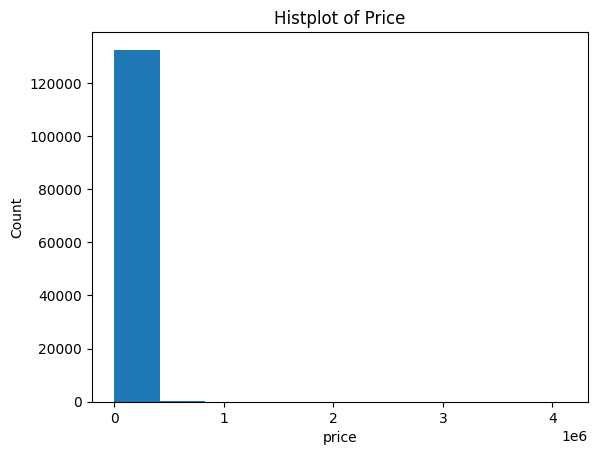

In [22]:
#Hist plot

plt.hist(df['Price'])
plt.title('Histplot of Price')

plt.xlabel('price')

plt.ylabel('Count')
plt.show()

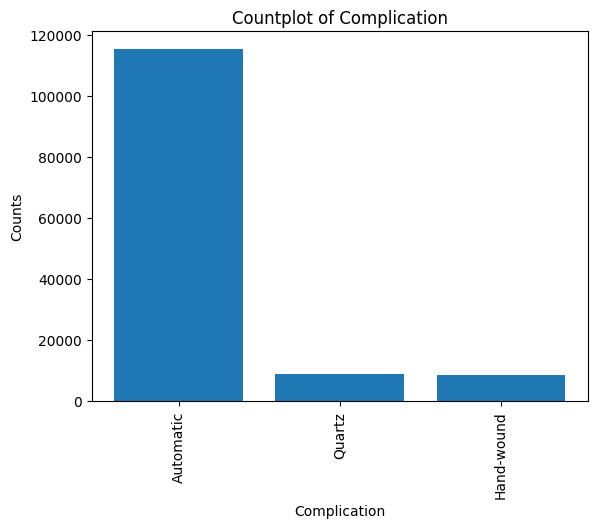

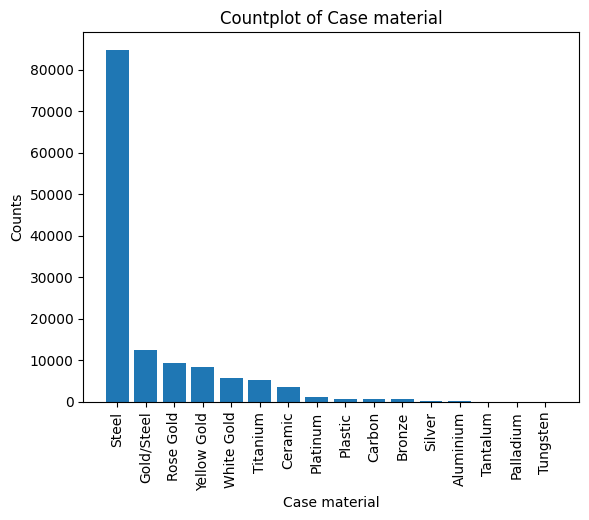

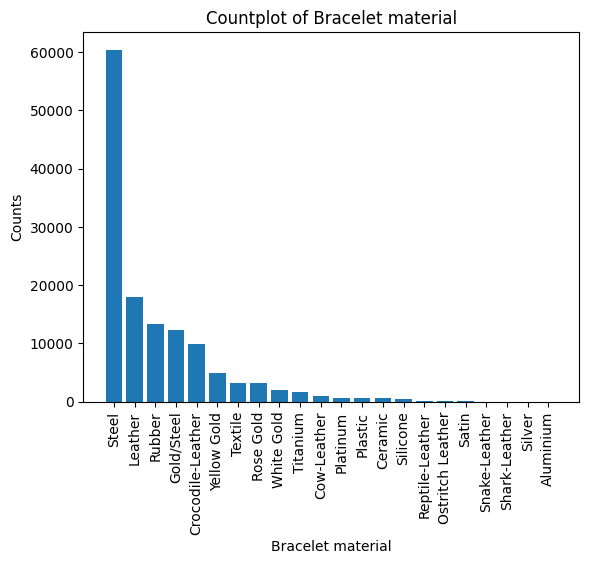

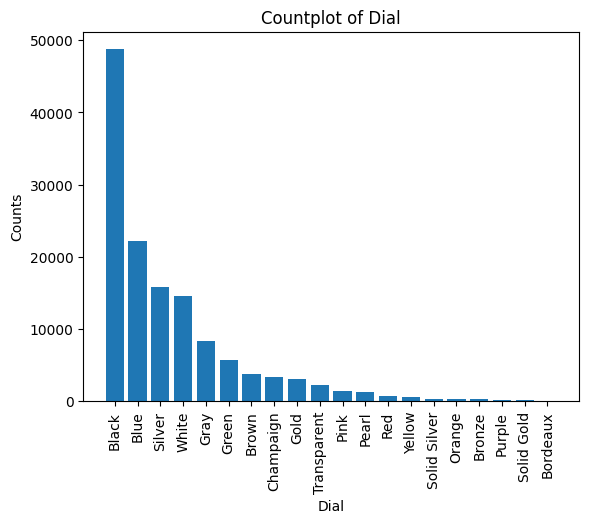

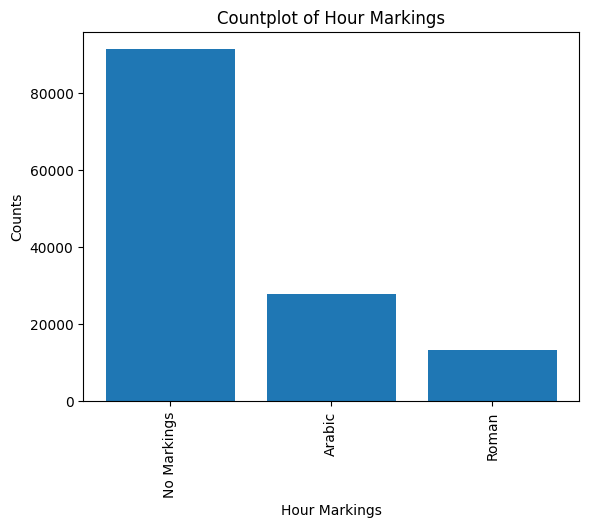

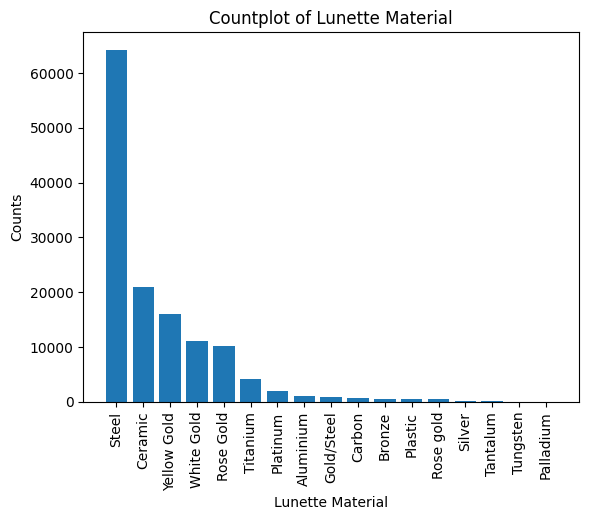

In [23]:
#Bar plot
for i in obj1:
  if df[i].nunique()<=25:
    plt.bar(x=df[i].value_counts().index,height=df[i].value_counts())
    plt.title(f'Countplot of {i}')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.show()


In [35]:
import plotly.graph_objects as go

In [36]:
v1=df['Complication'].value_counts()
fig=go.Figure([go.Bar(x=v1.index,y=v1,marker=dict(color='teal'))])
fig.update_layout(
    title='count of complication',
    xaxis_title='complication',
    yaxis_title='Count',
    template='plotly_dark'

)

fig.show()

Bivariate Analysis

In [25]:
df[['Brand','Price(Rs)']].groupby('Brand').agg(['mean','median','max','min','count']).sort_values(by=('Price(Rs)','mean'),ascending=False).head(5)

Price(Rs)                                              
                        mean       median           max          min count
Brand                                                                     
Greubel Forsey  4.070912e+07  40709115.59  4.070912e+07  40709115.59     1
Richard Mille   2.527333e+07  23782046.86  7.171450e+07   5289999.00   195
De Bethune      1.094430e+07   9937520.45  2.374897e+07   6574279.14     9
F.P.Journe      9.252316e+06   6446121.11  3.304731e+07   2742025.00    28
Patek Philippe  7.992369e+06   5905900.00  3.474827e+08    417631.50  5659

In [27]:
df.sort_values(by='Price(Rs)').head(10)

,Brand,Model,Reference,Complication,Case material,Bracelet material,Dial,Hour Markings,Lunette Material,Price,Price(Rs)
63795,Seiko,5,SNXS77,Automatic,Steel,Steel,Blue,No Markings,Steel,53,4471.61
90946,Casio,G-Shock,G-2900F-1V,Quartz,Plastic,Plastic,Gray,Arabic,Plastic,54,4555.98
84672,Casio,G-Shock,GA-2100-1A1ER,Quartz,Plastic,Rubber,Black,No Markings,Plastic,68,5737.16
91550,Casio,G-Shock,GA-100BP-1A,Quartz,Plastic,Plastic,Blue,No Markings,Plastic,68,5737.16
90942,Casio,G-Shock,DW9052-1BCR,Quartz,Plastic,Plastic,Gray,Arabic,Plastic,69,5821.53
44967,Locman,Sport Tonneau,487,Quartz,Aluminium,Leather,Black,Arabic,Aluminium,73,6159.01
84671,Tissot,Seastar,315T,Hand-wound,Steel,Steel,Silver,No Markings,Steel,75,6327.75
104784,Casio,Edifice,EFV-100D-2AVUEF,Quartz,Steel,Steel,Blue,No Markings,Steel,76,6412.12
132318,Casio,G-Shock,DW-5600LS-7DR,Automatic,Plastic,Plastic,Transparent,Roman,Steel,76,6412.12
58400,Seiko,Kinetic,5M43-0A70,Automatic,Steel,Steel,White,No Markings,Bronze,77,6496.49


In [28]:
df[['Brand','Model','Reference','Price(Rs)']].sort_values(by='Price(Rs)',ascending=False).head(10)

,Brand,Model,Reference,Price(Rs)
31937,Patek Philippe,Minute Repeater,6301P-001,3.474827e+08
62520,Patek Philippe,Minute Repeater Perpetual Calendar,5304301R-001,2.832575e+08
31888,Patek Philippe,Nautilus,57111A-018,2.636076e+08
131622,Patek Philippe,Nautilus,57111A-018,2.306772e+08
87346,Patek Philippe,Nautilus,57111A-018,2.154175e+08
126665,Patek Philippe,Nautilus,57111A-018,2.142003e+08
61520,Patek Philippe,Nautilus,57111A-018,2.058628e+08
62519,Patek Philippe,Minute Repeater,5303R-001,1.583630e+08
31338,Patek Philippe,Nautilus,59901400G-011,1.270188e+08
62514,Audemars Piguet,Royal Oak Offshore,26582CB.OO.A010CA.01,1.044869e+08


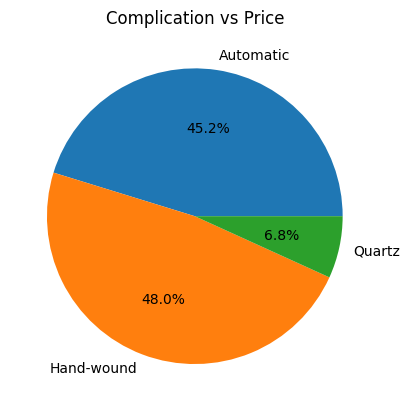

In [29]:
#Pie plots
v1=df.groupby('Complication')['Price(Rs)'].mean()
plt.pie(v1,labels=v1.index,autopct='%1.1f%%')
plt.title('Complication vs Price')
plt.show()

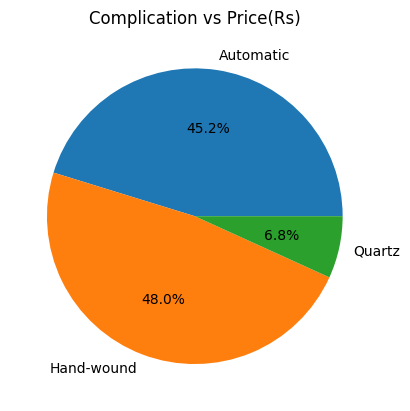

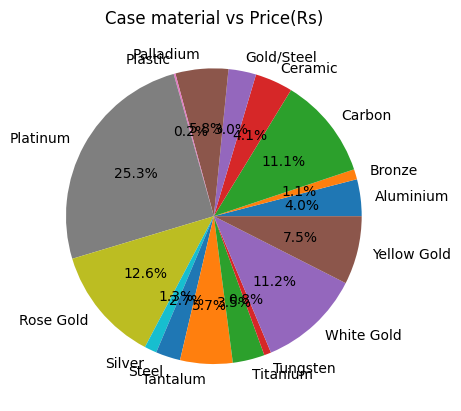

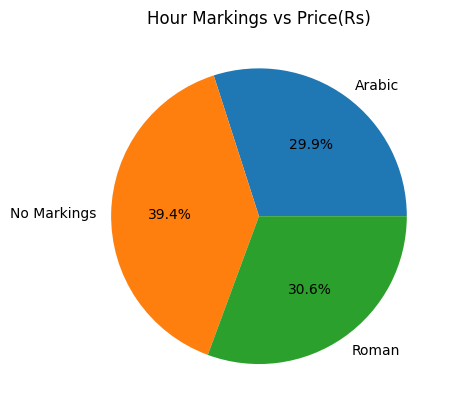

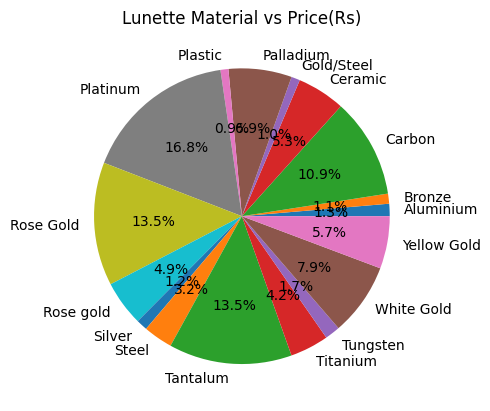

In [30]:
for i in obj1:
  if df[i].nunique()<=17:
    plt.pie(df.groupby(i)['Price(Rs)'].mean(),labels=df.groupby(i)['Price(Rs)'].mean().index,autopct='%1.1f%%')
    plt.title(f'{i} vs Price(Rs)')
    plt.show()

In [31]:
df[['Case material','Price(Rs)']].groupby('Case material').agg(['mean','median','max','min','count']).sort_values(by=('Price(Rs)','mean'),ascending=False)

Price(Rs)                                             
                       mean       median           max        min  count
Case material                                                           
Platinum       9.643380e+06  7795619.260  3.474827e+08  418390.83   1191
Rose Gold      4.822422e+06  3590618.460  2.832575e+08   32482.45   9233
White Gold     4.278049e+06  3277985.425  1.270188e+08  120733.47   5722
Carbon         4.247747e+06  1116805.690  7.171450e+07    7087.08    615
Yellow Gold    2.853804e+06  2172611.870  7.988109e+07   11136.84   8358
Palladium      2.204504e+06  1916253.625  5.239883e+06  629062.72      8
Tantalum       2.185482e+06   999995.425  9.689557e+06   41931.89     24
Ceramic        1.577245e+06   700017.890  1.044869e+08   17970.81   3557
Aluminium      1.536515e+06   202403.630  4.473348e+07    6159.01     67
Titanium       1.334174e+06   579242.235  6.069283e+07    9280.70   5178
Gold/Steel     1.154474e+06  1140766.770  1.917148e+07   11811.80  12474
Steel          1.028510e+06   525118.880  2.636076e+08    4471.61  84776
Silver         5.139014e+05   325752.570  5.715899e+06    9618.18    205
Bronze         4.224726e+05   307950.500  2.488915e+06   18477.03    587
Tungsten       2.922999e+05   162243.510  8.943220e+05   44884.84      8
Plastic        7.242308e+04    12149.280  1.297602e+07    4555.98    635

In [32]:
df[['Bracelet material','Price(Rs)']].groupby('Bracelet material').agg(['mean','median','max','min','count']).sort_values(by=('Price(Rs)','max'),ascending=False)

Price(Rs)                                             
                           mean       median           max        min  count
Bracelet material                                                           
Crocodile-Leather  2.332121e+06  1049984.650  3.474827e+08   26660.92   9955
Steel              1.197992e+06   706261.270  2.636076e+08    4471.61  60399
White Gold         5.536557e+06  3750921.460  1.270188e+08  134148.30   2082
Rubber             2.338893e+06   877616.740  1.044869e+08    5737.16  13301
Leather            7.847674e+05   353172.820  1.016167e+08    6159.01  17979
Rose Gold          7.208628e+06  4724129.410  9.855184e+07  154903.32   3250
Yellow Gold        3.481323e+06  3168684.090  7.988109e+07   37207.17   4870
Platinum           1.043467e+07  9157561.985  7.508930e+07  576668.95    632
Titanium           1.038083e+06   393543.865  6.069283e+07   16789.63   1674
Ceramic            4.136097e+06   709003.295  5.863715e+07   37882.13    580
Textile            5.644355e+05   173422.535  3.836633e+07    9365.07   3294
Cow-Leather        1.094086e+06   415100.400  2.156792e+07   13161.72   1059
Gold/Steel         1.209539e+06  1214084.300  1.917148e+07   11389.95  12236
Plastic            1.178309e+05    11136.840  1.782131e+07    4555.98    599
Ostritch Leather   8.865270e+05   331152.250  1.384453e+07   34676.07     64
Reptile-Leather    1.125598e+06   310987.820  1.248676e+07   13077.35     84
Silicone           1.485692e+05    44631.730  9.086565e+06   12149.28    466
Shark-Leather      5.863635e+05   302888.300  4.816177e+06   71714.50     21
Satin              1.220472e+06  1069389.750  4.633010e+06   28685.80     41
Snake-Leather      8.976968e+05   463191.300  3.370582e+06    8774.48     31
Silver             5.363248e+05   371228.000  2.050950e+06   24382.93     11
Aluminium          2.973283e+05   242563.750  1.054625e+06   30120.09     10